## Finalize The Model

Menggunakan model terakhir --> `just_cake_model-colab6_2.h5`

In [2]:
# conda install -c conda-forge keras

In [3]:
import os
import re
import glob

import scipy.io
import cv2
from PIL import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import shutil

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scipy.io import loadmat
import random
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model
import tensorflow as tf
import keras as K


    keras == 2.4.3
    tensorflow == 2.4.1

In [7]:
# PATH_DATA = '../data/'
PATH_DATA_IMAGES = '../../My-Dataset/Images-Dataset/dataset257/'
# PATH_DATA_IMAGES = 'drive/MyDrive/Repository/Data/dataset257/'
PATH_DATA_TRAIN = PATH_DATA_IMAGES+'train/'
PATH_DATA_VAL = PATH_DATA_IMAGES+'validation/'
PATH_DATA_TEST = PATH_DATA_IMAGES+'test/'
# PATH_MODEL = '../artifact/'
PATH_MODEL = '../../just_cake_artf/'

In [8]:
os.listdir(PATH_DATA_TRAIN)

['.DS_Store',
 'kue_kastengel',
 'kue_dadar_gulung',
 'kue_klepon',
 'kue_risoles',
 'kue_lumpur',
 'kue_serabi',
 'kue_lapis',
 'kue_putri_salju']

## Get Model

In [9]:
# depd = {'auc_1' : metrics.AUC}
model_load6_2 = load_model(PATH_MODEL + 'just_cake_model-colab6_2.h5')

In [10]:
model_load6_2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

## Get Images

In [11]:
lab = ['kue_dadar_gulung',
 'kue_kastengel',
 'kue_klepon',
 'kue_lapis',
 'kue_lumpur',
 'kue_putri_salju',
 'kue_risoles',
 'kue_serabi']

## label dict
label_dict = dict(zip([i for i in range(len(lab))],lab))
label_dict

{0: 'kue_dadar_gulung',
 1: 'kue_kastengel',
 2: 'kue_klepon',
 3: 'kue_lapis',
 4: 'kue_lumpur',
 5: 'kue_putri_salju',
 6: 'kue_risoles',
 7: 'kue_serabi'}

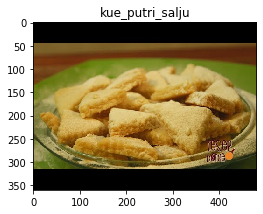

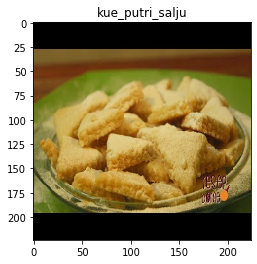

In [12]:
RAND_LAB = random.choice(lab)

RAND_LAB = lab[5]
PATH_TMP = PATH_DATA_TRAIN+RAND_LAB+'/'

random_img = random.choice(os.listdir(PATH_TMP))
img1 = cv2.imread(PATH_TMP+random_img)  
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
plt.figure(figsize = (4,4))
plt.title(RAND_LAB)
plt.imshow(img1)

img2 = cv2.resize(img1,(224,224)) * (1/255)
plt.figure(figsize = (4,4))
plt.title(RAND_LAB)
plt.imshow(img2)

In [13]:
img1.shape

(360, 480, 3)

In [14]:
img2.shape

(224, 224, 3)

In [15]:
img3 = img2.reshape((1,224,224,3))

## Predict 

In [16]:
pred_img = model_load6_2.predict(img3)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [17]:
label_dict[np.argmax(pred_img, axis=1)[0]]

'kue_risoles'

## Merge Scripts

In [18]:
def predict_images(PATH_SINGLE_IMG, img_show = False):
    img1 = cv2.imread(PATH_SINGLE_IMG)  
    img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2BGR)
    img2 = cv2.resize(img1,(224,224)) * (1/255)
    if img_show:
        plt.figure(figsize = (5,5))
        plt.imshow(img2)
        
    img3 = img2.reshape((1,224,224,3))
    pred_img = model_load6_2.predict(img3)[0]
    img_id = np.argmax(pred_img)
    img_label = label_dict[img_id]
    
    return img_label, pred_img[img_id], pred_img

('kue_serabi', 0.9996251, array([6.9319628e-07, 8.0895561e-06, 2.1797428e-06, 1.0699463e-08,
       2.8184682e-04, 4.1367031e-05, 4.0748928e-05, 9.9962509e-01],
      dtype=float32))
kue_serabi


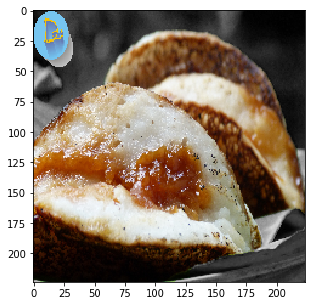

In [19]:
## Random Images
RAND_LAB = random.choice(lab)
# PATH_TMP = PATH_DATA_TRAIN+RAND_LAB+'/'
PATH_TMP = PATH_DATA_TEST+RAND_LAB+'/'
RAND_IMG = random.choice(os.listdir(PATH_TMP))
PATH_RAND_IMG = PATH_TMP+RAND_IMG

print(predict_images(PATH_RAND_IMG, img_show=True))
print(RAND_LAB)

('kue_lapis', 0.99945, array([4.0216284e-04, 2.5804633e-05, 4.8756796e-05, 9.9945003e-01,
       1.9954941e-05, 2.1127495e-05, 1.0117476e-05, 2.2055270e-05],
      dtype=float32))
kue_lapis


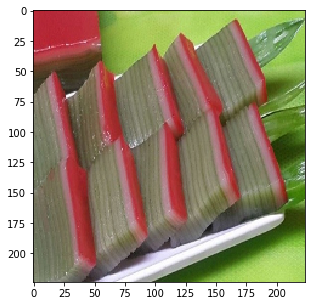

In [20]:
## Random Images
RAND_LAB = random.choice(lab)
# PATH_TMP = PATH_DATA_TRAIN+RAND_LAB+'/'
PATH_TMP = PATH_DATA_TEST+RAND_LAB+'/'
RAND_IMG = random.choice(os.listdir(PATH_TMP))
PATH_RAND_IMG = PATH_TMP+RAND_IMG

print(predict_images(PATH_RAND_IMG, img_show=True))
print(RAND_LAB)

True Class : kue_serabi
Predict Class : kue_serabi
Confidence : 0.986


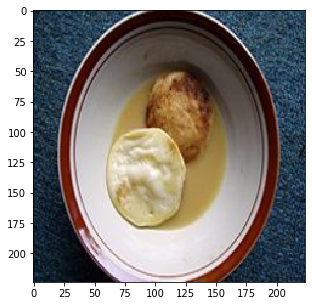

In [77]:
## Random Images
# RAND_LAB = random.choice(lab)
RAND_LAB = lab[7]

# PATH_TMP = PATH_DATA_TRAIN+RAND_LAB+'/'
PATH_TMP = PATH_DATA_TEST+RAND_LAB+'/'
RAND_IMG = random.choice(os.listdir(PATH_TMP))
PATH_RAND_IMG = PATH_TMP+RAND_IMG

# print(predict_images(PATH_RAND_IMG, img_show=True))

predict_label, confidence, _ = predict_images(PATH_RAND_IMG, img_show=True)
print('True Class :',RAND_LAB)
print('Predict Class :',predict_label)
print('Confidence :',round(confidence,3))

## Check Other MissClass

In [22]:
img_miss_classification = []
for L in lab:
    PATH_TMP_1 = PATH_DATA_TEST+L+'/'
    IMG_LIST_1 = os.listdir(PATH_TMP_1)
    
    for img_ in IMG_LIST_1:
        path_img1 = PATH_TMP_1+img_
        try:
            Label_Pred, prob_val, _ = predict_images(path_img1)

            if Label_Pred!=L:
                img_miss_classification.append(path_img1)
        except:
            print('PROBLEM :',path_img1)
        

PROBLEM : ../../My-Dataset/Images-Dataset/dataset257/test/kue_putri_salju/4.gif
PROBLEM : ../../My-Dataset/Images-Dataset/dataset257/test/kue_putri_salju/11.gif


In [23]:
len(img_miss_classification)

10

True Class : kue_putri_salju
Predict Class : kue_lumpur
Confidence : 0.368


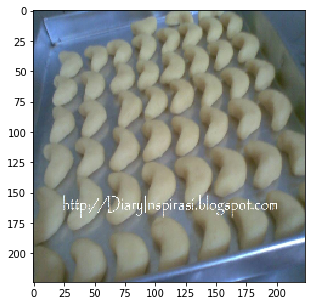

In [43]:
miss_img_2 = img_miss_classification[5]
predict_label, confidence, _ = predict_images(miss_img_2, img_show = True) 
# print(predict_images(miss_img_2, img_show = True))
print('True Class :',miss_img_2.split('/')[-2])
print('Predict Class :',predict_label)
print('Confidence :',round(confidence,3))


## Check Less Confidence

In [95]:
img_less_conf = []
for L in lab:
    PATH_TMP_1 = PATH_DATA_TEST+L+'/'
    IMG_LIST_1 = os.listdir(PATH_TMP_1)
    
    for img_ in IMG_LIST_1:
        path_img1 = PATH_TMP_1+img_
        try:
            Label_Pred, conf_L, _ = predict_images(path_img1)

            if (conf_L<0.9) & (Label_Pred==L):
                img_less_conf.append(path_img1)
        except:
            print('PROBLEM :',path_img1)
        

PROBLEM : ../../My-Dataset/Images-Dataset/dataset257/test/kue_putri_salju/4.gif
PROBLEM : ../../My-Dataset/Images-Dataset/dataset257/test/kue_putri_salju/11.gif


In [96]:
len(img_less_conf)

11

True Class : kue_lumpur
Predict Class : kue_lumpur
Confidence : 0.896


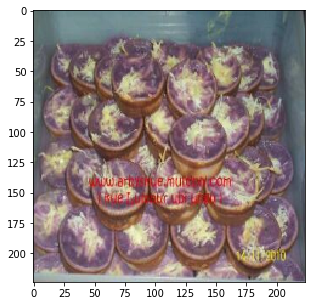

In [106]:
miss_lss_c = img_less_conf[5]
predict_label, confidence, _ = predict_images(miss_lss_c, img_show = True) 
# print(predict_images(miss_img_2, img_show = True))
print('True Class :',miss_lss_c.split('/')[-2])
print('Predict Class :',predict_label)
print('Confidence :',round(confidence,3))
